In [1]:
import qnm_filter
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import multivariate_normal

In [19]:
mass_space = np.linspace(-1,1,int(1e3))
chi_space = np.linspace(-1,1,int(1e3))

mass_grid, chi_grid = np.meshgrid(mass_space, chi_space)
grid = np.dstack((mass_grid, chi_grid))

In [31]:
var = multivariate_normal(mean=[0,0], cov=[[0.01,0],[0,0.01]])
pdf = var.pdf(grid)
ln_pdf = np.log(pdf)

In [32]:
np.sqrt(0.01)

0.1

In [33]:
proj0, proj1 = qnm_filter.project_to_1d(pdf, grid_side, grid_side)

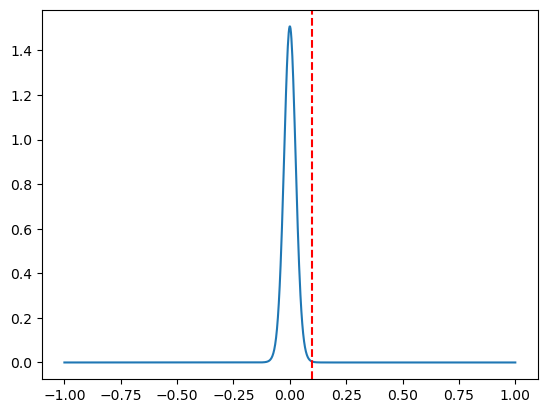

In [34]:
pl.plot(mass_space, proj0)
pl.axvline(0.1, c = 'r', ls = '--')

In [36]:
np.sum(proj0[np.abs(proj0)<0.1])/np.sum(proj0)

0.02479871587987796

In [4]:
grid_side = mass_space[1] - mass_space[0]
print("Is the pdf normalised: %r" % np.isclose(np.sum(pdf*grid_side**2),1))

Is the pdf normalised: True


In [8]:
temp0 = var.pdf([0.01, 0])
temp = pdf[pdf>temp0]
np.sum(temp*grid_side**2)

0.0

In [15]:
credible_region = qnm_filter.find_credible_region(pdf, target_probability = 0.683)

/home/neil/Dropbox/Ringdown/Codebase/qnm_filter/qnm_filter/utility.py:208: UserWarning: Cannot find the root, root distance was [-0.00853231] and so the         credible region estimate will be poor
  warnings.warn("Cannot find the root, root distance was {} and so the \


/tmp/ipykernel_170846/2097539500.py:2: UserWarning: No contour levels were found within the data range.
  dotted = pl.contour(mass_grid, chi_grid, np.log10(pdf), [credible_region], colors = 'red', \


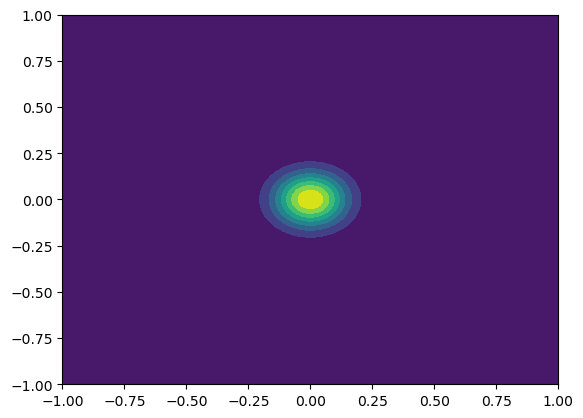

In [16]:
pl.contourf(mass_grid, chi_grid, pdf)
dotted = pl.contour(mass_grid, chi_grid, np.log10(pdf), [credible_region], colors = 'red', \
                   linestyles ='--')

In [106]:
threshold = 10**credible_region

In [12]:
np.sum(pdf[pdf>credible_region]*grid_side**2)

0.997939846585264